## Descrición del proyecto
Has decidido abrir un pequeño café atendido por robots en Los Angeles. El proyecto es prometedor, pero caro, así que tú y tus compañeros piensan intentar atraer inversionistas. Están interesados en las condiciones actuales del mercado, ¿serás capaz de mantener tu éxito cuando la novedad de los camareros robot desaparezca?

## Objetivo
Realizar un estudio de mercado para atraer inversionistas 


## Etapas del proyecto
* Descripción de los datos
* Análisis de datos 
* Conclusión general

# Descripción de datos

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [41]:
try:
      df = pd.read_csv('/content/moved_rest_data_us.csv')

except:
      df = pd.read_csv('/datasets/rest_data_us.csv')

In [42]:
# Mostrar datframe
df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [43]:
df.columns = ['id','name','address','chain','establishment','chairs']

In [44]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             9651 non-null   int64 
 1   name           9651 non-null   object
 2   address        9651 non-null   object
 3   chain          9648 non-null   object
 4   establishment  9651 non-null   object
 5   chairs         9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [45]:
# Tabla con datos nulos
nan_rows = df[df.isnull().any(1)]
nan_rows

,id,name,address,chain,establishment,chairs
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [46]:
# porcentaje de datos nulos
df_null = df.isna()
df_null.mean() * 100

id               0.000000
name             0.000000
address          0.000000
chain            0.031085
establishment    0.000000
chairs           0.000000
dtype: float64

In [47]:
# Cantidad de registros únicos
df.id.nunique()

9651

In [48]:
# Eliminar nulos
df = df.dropna()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             9648 non-null   int64 
 1   name           9648 non-null   object
 2   address        9648 non-null   object
 3   chain          9648 non-null   object
 4   establishment  9648 non-null   object
 5   chairs         9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


In [50]:
# Cantidad de duplicados
df.duplicated().sum()

0

In [51]:
duplicates = df.duplicated(subset=['name','address'], keep=False).sum()
duplicates

0

In [52]:
# Cambiar formato columna chain
df.chain = df.chain.astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             9648 non-null   int64 
 1   name           9648 non-null   object
 2   address        9648 non-null   object
 3   chain          9648 non-null   bool  
 4   establishment  9648 non-null   object
 5   chairs         9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 461.7+ KB


## Conclusión 
En términos generales la base de datos se encontraba limpia, corregimos los datos nulos de la columna chain la cual contaba con un 0.03 % de datos nulos, al ser un número tan pequeño y no encontrar correlación aparente con el resto de los datos, se decide eliminarlos. Por último cambiamos el formato de la misma columna, ya que su formato inicial era object y lo pasamos a booleanos.

---

# Análisis de datos

Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.

In [53]:
df.head()

,id,name,address,chain,establishment,chairs
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [54]:
# tabla de proporciones
prop = df.establishment.value_counts().reset_index()
prop.columns = ['tipo_local','cantidad_local']
prop

,tipo_local,cantidad_local
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


In [55]:
fig = go.Figure(data=[go.Pie(labels=prop.tipo_local, values=prop.cantidad_local,
                             title="Proporción por tipo de establecimiento")])
fig.update_layout(width=500,height=500)
fig.show()

Tras analizar la proporción de los distintos tipos de establecimientos, concluimos que:
* El 75 % de los establecimientos corresponde a Restaurantes 
* El 11 % de los establecimientos corresponde a Fast food
* Solo un 4.5 % De los establecimientos corresponde a café
---

Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.

In [56]:
proporcion = df.chain.value_counts().reset_index()
proporcion.columns = ['Chain','cantidad']
proporcion

,Chain,cantidad
0,False,5972
1,True,3676


In [57]:
fig = px.pie(proporcion, values=proporcion.cantidad, 
             title='Proporción de establecimiento que pertenecen a una cadena y los que no')
fig.show()

El gráfico nos muestra que el 61.9% de los establecimientos en Los Angeles, no pertenece a una cadena, por ende el otro 38.1% si pertenece a una cadena.

In [58]:
# Filtro por cadena 
chain = df.query('chain == True')
chain.head()

,id,name,address,chain,establishment,chairs
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26


In [59]:
# tabla de proporciones
chain_prop = chain.establishment.value_counts().reset_index()
chain_prop.columns = ['tipo_local','cantidad_local']
chain_prop

,tipo_local,cantidad_local
0,Restaurant,2292
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,153
5,Bar,77


In [60]:
fig = go.Figure(data=[go.Pie(labels=chain_prop.tipo_local, values=chain_prop.cantidad_local,
                             title="Proporción de establecimiento que pertenecen a una cadena")])
fig.update_layout(width=500,height=500)
fig.show()

Tras analizar la proporción de establecimientos que pertenecen a una cadena concluimos que:
* El 62% de los establecimientos corresponde a Restaurantes
* El 16% corresponde a Fast food
* Y el 7.7% corresponde a café
---

In [61]:
# filtro no cadena
nochain = df.query('chain == False')
nochain.head()

,id,name,address,chain,establishment,chairs
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [62]:
# tabla de proporciones
nochain_prop = nochain.establishment.value_counts().reset_index()
nochain_prop.columns = ['tipo_local','cantidad_local']
nochain_prop

,tipo_local,cantidad_local
0,Restaurant,4961
1,Fast Food,461
2,Bar,215
3,Cafe,169
4,Pizza,166


In [63]:
fig = go.Figure(data=[go.Pie(labels=nochain_prop.tipo_local, values=nochain_prop.cantidad_local,
                             title="Proporción de establecimiento que no pertenecen a una cadena")])
fig.update_layout(width=500,height=500)
fig.show()

Tras analizar la proporción de establecimientos que no pertenecen a una cadena, concluimos que:
* El 83 % de los establecimientos corresponde a Restaurantes
* El 7.7 % corresponde a Fast food
* El 3.6 % corresponde a café
* Las bakerys no tienen registro en no cadenas.
---

¿Qué tipo de establecimiento es habitualmente una cadena?

In [64]:
cadena_tipo = df.groupby('establishment')['chain'].agg(['count','sum']).reset_index()
cadena_tipo['proporcion'] = cadena_tipo['sum']*100/cadena_tipo['count']
cadena_tipo['proporcion'] = cadena_tipo['proporcion'].round()
cadena_tipo

,establishment,count,sum,proporcion
0,Bakery,283,283,100.0
1,Bar,292,77,26.0
2,Cafe,435,266,61.0
3,Fast Food,1066,605,57.0
4,Pizza,319,153,48.0
5,Restaurant,7253,2292,32.0


In [65]:
fig = px.bar(cadena_tipo, x='establishment', y='proporcion',
             title='Proporción de establecimientos que son cadena de cada tipo de establecimiento')
fig.show()

Como muestra el gráfico anterior, los tipos de establecimientos que habitualmente son cadenas son las pastelerías, cafés y fast food. Podemos aportar que técnicamente los locales se transforman en cadena cuando tienen una madurez como negocio, un producto o servicio probado y que se puede estandarizar en distintos lugares. Esto lleva a que el cliente conoce la marca y ya sabe lo que debería encontrar dentro, por el lado de la empresa es una eficiencia en la economía de escala y el crecimiento rápido de la compañía.

---






¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

In [66]:
# Descripción estadística de la tabla no cadena
nochain.chairs.describe()

count    5972.000000
mean       46.171467
std        49.875746
min         1.000000
25%        14.000000
50%        28.000000
75%        47.000000
max       229.000000
Name: chairs, dtype: float64

In [67]:
fig = px.histogram(nochain, x="chairs",title='Distribución de asientos en cadenas')
fig.show()

In [68]:
# Descripciójn estadística de la tabla cadena
chain.chairs.describe()

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: chairs, dtype: float64

In [69]:
fig = px.histogram(chain, x="chairs", title='Distribución de asientos en no cadenas')
fig.show()

Según los datos analizados, una de las características que tiene los establecimientos que pertenecen a cadenas es pocos locales (En comparación a los que no son cadenas) y gran cantidad de asientos. La cantidad de locales va a estar fuertemente ligada al tiempo en el mercado de la cadena y a su expansión territorial.

---

Determina el promedio de número de asientos para cada tipo de establecimiento. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.

In [70]:
chair_mean = df.groupby('establishment')['chairs'].mean().reset_index()
chair_mean.columns = ['Establecimiento','sillas']
chair_mean

,Establecimiento,sillas
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.545455
5,Restaurant,48.048807


In [71]:
fig = px.bar(chair_mean, x='Establecimiento', y='sillas',
             title='Promedio de número de asientos para cada tipo de establecimiento')
fig.show()

El establecimiento con mayor número de asientos son los restaurantes, esto se debe a su tamaño, su público objetivo que en mayor parte es familiar y su momento de consumo, ya que se orienta fuertemente a los almuerzos y sobre todo cenas.

---

Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [72]:
df['street'] = df['address'].str.extract(pat='([a-zA-Z][\w ]+(?!STE|UNIT|MEZZ|[\w ]+))')
df['street'] = df['street'].str.strip()
df.head()

,id,name,address,chain,establishment,chairs,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


Traza un gráfico de las diez mejores calles por número de establecimiento.


In [73]:
best_street = df.street.value_counts().head(10).reset_index()
best_street.columns = ['street' ,'numbers']
best_street

,street,numbers
0,W SUNSET BLVD,327
1,W PICO BLVD,313
2,WILSHIRE BLVD,245
3,SANTA MONICA BLVD,211
4,S WESTERN AVE,208
5,HOLLYWOOD BLVD,203
6,W 3RD ST,183
7,S FIGUEROA ST,178
8,S VERMONT AVE,177
9,W OLYMPIC BLVD,163


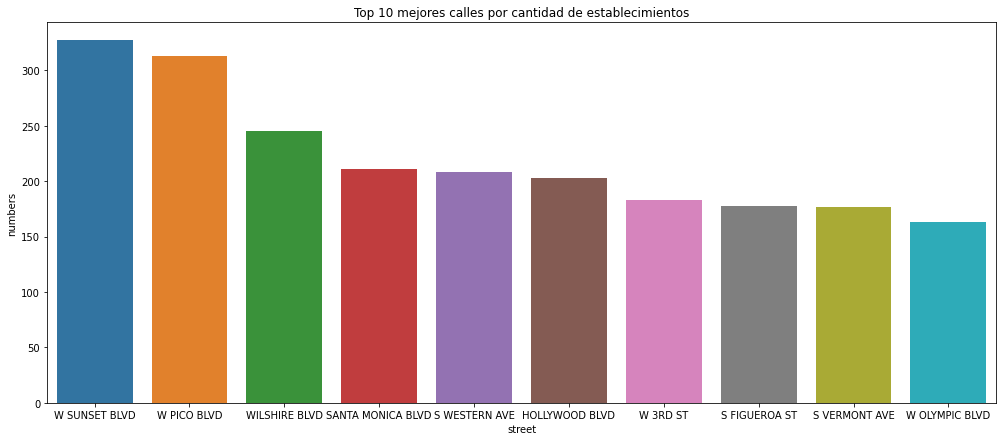

In [74]:
plt.figure(figsize=(17,7))
plt.title('Top 10 mejores calles por cantidad de establecimientos')
sns.barplot(
    data=best_street,
    y='numbers',
    x='street'
);

Tras ordenar las 10 mejores calles, Podemos concluir que W pico blvd y W sunset blvd son por lejos las mejores calles del sector.

Encuentra el número de calles que solo tienen un establecimiento.


In [75]:
rest_1 = df.street.value_counts().reset_index()
rest_1.columns=['calle','cantidad']
rest_1.head()

,calle,cantidad
0,W SUNSET BLVD,327
1,W PICO BLVD,313
2,WILSHIRE BLVD,245
3,SANTA MONICA BLVD,211
4,S WESTERN AVE,208


In [76]:
result = rest_1.query('cantidad == 1')
print('El número de calles que tiene solo un establecimiento es:', result.cantidad.sum())

El número de calles que tiene solo un establecimiento es: 1215


---

Para las calles con muchos establecimientos, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

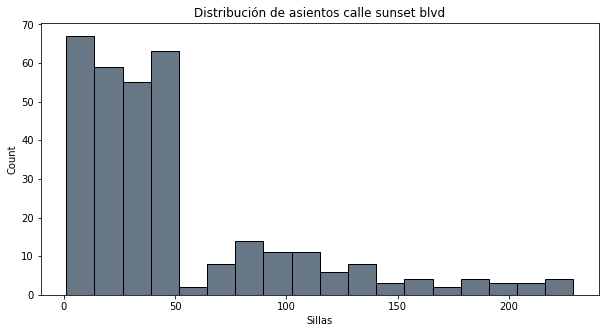

In [77]:
sunset = df.query('street == "W SUNSET BLVD"')
plt.figure(figsize=(10, 5))
sns.histplot(sunset, x='chairs', color='#34495E')
plt.title('Distribución de asientos calle sunset blvd')
plt.xlabel('Sillas');

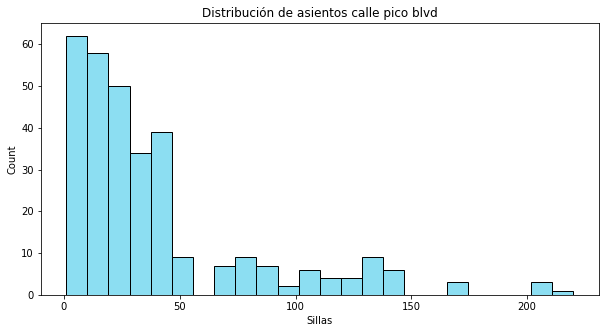

In [78]:
pico = df.query('street == "W PICO BLVD"')
plt.figure(figsize=(10, 5))
sns.histplot(pico, x='chairs', color='#66d3ee')
plt.title('Distribución de asientos calle pico blvd')
plt.xlabel('Sillas');

Tras analizar ambas calles podemos concluir que:
* Pico blvd muestra una menor cantidad de establecimientos y con una menor cantidad de sillas
* La cantidad de sillas en la calle Pico bldv va de 0 a 50 sillas promedio.
* Sunset blvd tiene una mayor cantidad de establecimientos y con mayor cantidad de sillas
* La mayoría de los establecimientos de Sunset blvd sus sillas van de las 0 a 50 asientos.

---

Llega a una conclusión y aporta recomendaciones sobre el tipo de restaurante y el número de asientos. Comenta la posibilidad de desarrollar una cadena.

## Conclusión general
Tras analizar los distintos datos y gráficos del proyecto, concluimos que:
* Los cafés están situados en 3.er lugar dentro del mercado de Los Angeles
* Su participación de mercado aumenta cuando pertenecen a una cadena
* Los cafés se consideran de baja inversión en comparación con el resto del mercado
* Es el establecimiento con la menor cantidad de sillas dentro del mercado
* En promedio son locales con 25 asientos
* Los Angeles cuenta con 1215 calles donde solo se tiene un establecimiento 
* Si bien la idea de robots es muy disruptiva, si puede ser un gran enganche lo novedoso.

Tras los puntos analizados se recomienda abrir un café con la idea inicial, estar por debajo del promedio con respecto a las sillas(25) para evaluar el movimiento de los robots dentro del café, La idea de desarrollar una cadena va a ir de la mano con la experiencia de los usuarios. En este punto no es analizable la idea, ya que el local no se encuentra en funcionamiento, su costosa implementación puede ser una piedra de tope.

Presentation: <https://drive.google.com/file/d/1V4TG3YHTZuzb-brA9h1XDiVsBU1UE2IM/view?usp=share_link>